In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import auc, roc_curve, precision_recall_curve
from sklearn.metrics import r2_score 
from scipy.optimize import lsq_linear
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

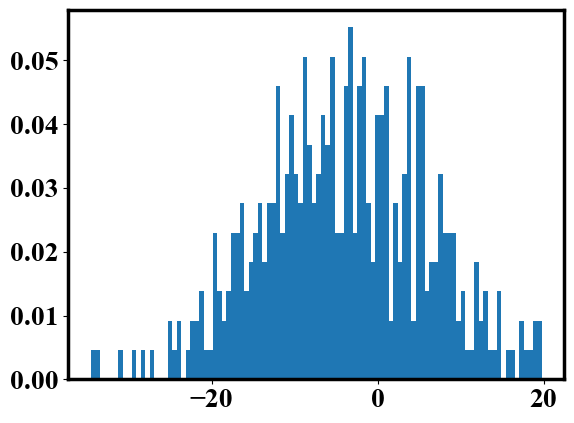

In [281]:
####### generating simulation data for Scenario 1 in the paper
####### section 1

p_i = [0.8, 0.2]# set probability of belonging to class 1 as 0.8.
n = 400   # set number of samples in the simulation


#set mean 0 and mean 1 for latent models
mu = [-5,1.25]  #12.5  mu0=-0.48
mu1= [-1,0.25]  #15      mu0=0.49
mu2=[-5.2,1.3]    #5       mu0=-0.39
mu3=[-1.04,0.26]
mu4 =  [-5,1.25] #12.5  mu0=-0.48
mu5= [-1,0.25] #15      mu0=0.49
mu6=[-5.2,1.3]     #5       mu0=-0.39
mu7=[-1.04,0.26]

# set standard deviation for latentmodels
sigma1 =[4,4]
sigma2 = [5,5]
sigma3 = [6, 6]
sigma4=[7,7]   #10       mu0=-0.47
sigma5 =[8,8]
sigma6 = [9,9]
sigma7 = [10,10]
sigma8=[11,11]   #10       mu0=-0.47

alpha5=[]
alpha1=[]
alpha2=[]
alpha3=[]
alpha4=[]
alpha6=[]
alpha7=[]
alpha8=[]
yy=[]
for i in range(n):
    z_i = np.argmax(np.random.multinomial(1, p_i))
    yy.append(z_i)
    x_i = np.random.normal(mu[z_i], sigma1[z_i])
    aa=np.random.normal(mu1[z_i], sigma2[z_i])
    bb=np.random.normal(mu2[z_i], sigma3[z_i])
    cc=np.random.normal(mu3[z_i], sigma4[z_i])
    dd=np.random.normal(mu4[z_i], sigma5[z_i])
    ee=np.random.normal(mu5[z_i], sigma6[z_i])
    ff=np.random.normal(mu6[z_i], sigma7[z_i])
    gg=np.random.normal(mu7[z_i], sigma8[z_i])
    alpha1.append(x_i)
    alpha2.append(aa)
    alpha3.append(bb)
    alpha4.append(cc)
    alpha5.append(dd)
    alpha6.append(ee)
    alpha7.append(ff)
    alpha8.append(gg)
plt.hist(alpha7, bins=100,density=True)
########################################### b values
#b_alpha1=np.random.normal(3.5,1.5,6)
b_alpha1=np.array([0.1])
#b_alpha2=np.random.normal(7,1.5,5)
b_alpha2=np.array([0.1])
#b_alpha3=np.random.normal(0,1.5,2)
b_alpha3=np.array([0.1])
#b_alpha4=np.random.normal(1.5,1.5,4)
b_alpha4=np.array([0.1])
#b_alpha5=np.random.normal(2.5,1.5,3)
b_alpha5=np.array([0.1])

b_alpha6=np.array([0.1])
b_alpha7=np.array([0.1])
b_alpha8=np.array([0.1])
####################################### X values
true_acc1=(b_alpha1*6.25)/(((b_alpha1*4)**2)+0.01)
true_acc2=(b_alpha2*1.25)/(((b_alpha2*5)**2)+0.01)
true_acc3=(b_alpha3*6.5)/(((b_alpha3*6)**2)+0.01)
true_acc4=(b_alpha4*1.3)/(((b_alpha4*7)**2)+0.01)
true_acc5=(b_alpha5*6.25)/(((b_alpha5*8)**2)+0.01)
true_acc6=(b_alpha6*1.25)/(((b_alpha6*9)**2)+0.01)
true_acc7=(b_alpha7*6.5)/(((b_alpha7*10)**2)+0.01)
true_acc8=(b_alpha8*1.3)/(((b_alpha8*11)**2)+0.01) 
true_acc=list(true_acc1)+list(true_acc2)+list(true_acc3)+list(true_acc4)+list(true_acc5)+list(true_acc6)+list(true_acc7)+list(true_acc8)
epsilon=np.random.normal(0,0.3,400)
x1=[]
x1_std=[]
for i in range (0,1):
    a=(b_alpha1[i]*np.array(alpha1))+np.random.normal(0,0.1,400)
    b=(a-np.mean(a))/(np.std(a))
    x1_std.append(np.std(a))
    x1.append(b)
x2=[]
x2_std=[]
for i in range (0,1):
    a=(b_alpha2[i]*np.array(alpha2))+np.random.normal(0,0.1,400)
    b=(a-np.mean(a))/(np.std(a))
    x2_std.append(np.std(a))
    x2.append(b)
x3=[]
x3_std=[]
for i in range (0,1):
    a=(b_alpha3[i]*np.array(alpha3))+np.random.normal(0,0.1,400)
    b=(a-np.mean(a))/(np.std(a))
    x3_std.append(np.std(a))
    x3.append(b)    
x4=[]
x4_std=[]
for i in range (0,1):
    a=(b_alpha4[i]*np.array(alpha4))+np.random.normal(0,0.1,400)
    b=(a-np.mean(a))/(np.std(a))
    x4_std.append(np.std(a))
    x4.append(b)     
x5=[]
x5_std=[]
for i in range (0,1):
    a=(b_alpha5[i]*np.array(alpha5))+np.random.normal(0,0.1,400)
    b=(a-np.mean(a))/(np.std(a))
    x5_std.append(np.std(a))
    x5.append(b)  

x6=[]
x6_std=[]
for i in range (0,1):
    a=(b_alpha6[i]*np.array(alpha6))+np.random.normal(0,0.1,400)
    b=(a-np.mean(a))/(np.std(a))
    x6_std.append(np.std(a))
    x6.append(b) 
    
x7=[]
x7_std=[]
for i in range (0,1):
    a=(b_alpha7[i]*np.array(alpha7))+np.random.normal(0,0.1,400)
    b=(a-np.mean(a))/(np.std(a))
    x7_std.append(np.std(a))
    x7.append(b) 

x8=[]
x8_std=[]
for i in range (0,1):
    a=(b_alpha8[i]*np.array(alpha8))+np.random.normal(0,0.1,400)
    b=(a-np.mean(a))/(np.std(a))
    x8_std.append(np.std(a))
    x8.append(b)     
x=np.concatenate([x1,x2,x3,x4,x5,x6,x7,x8])


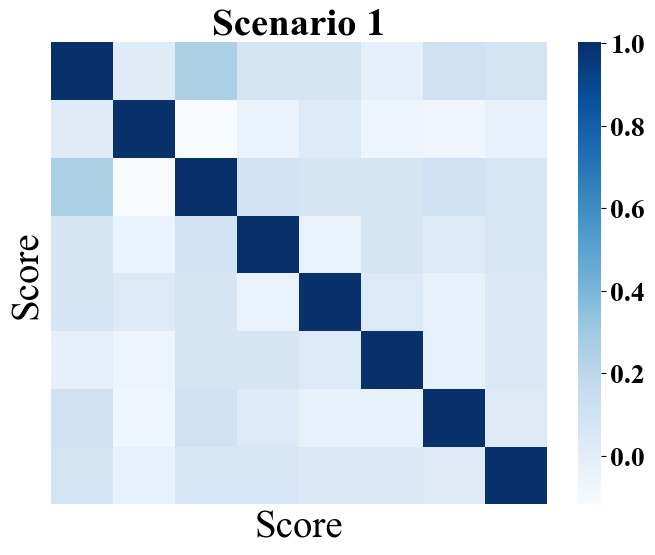

In [306]:
##### section 2
asa=np.cov(x) 
import seaborn as sb 
plt.figure(figsize=(8, 6)) 
sb.heatmap(asa,cmap="Blues") 
plt.xticks([]) 
plt.yticks([]) 
plt.ylabel("Score", fontsize=28)
plt.xlabel("Score", fontsize=28)
plt.title("Scenario 1", fontsize=28, fontweight='bold')
plt.savefig('independent_1_quartet.tiff', format='tiff', dpi=600, bbox_inches='tight')

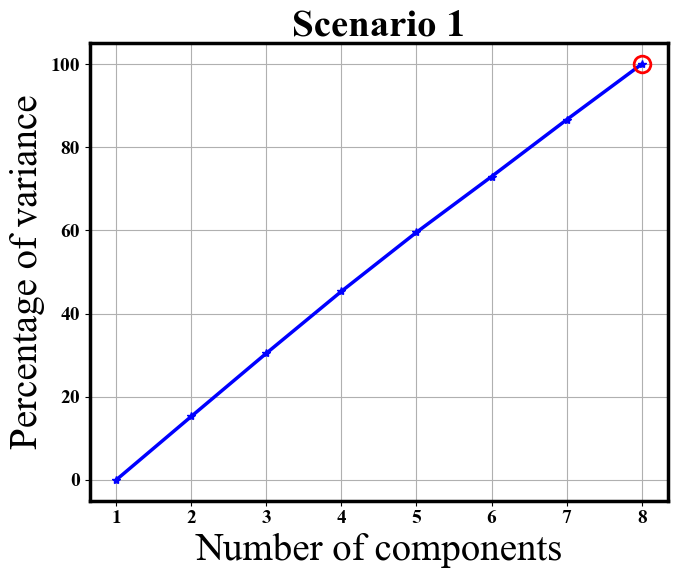

In [321]:
###### section 3
###### Elbow method
new_score=x
K = range(1, 9)
KM = [KMeans(n_clusters=k, random_state=42).fit(new_score) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(new_score, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d) / new_score.shape[0] for d in dist]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(new_score)**2) / new_score.shape[0]
bss = tss - wcss

kIdx = 7

# Elbow curve
fig, ax = plt.subplots(figsize=(7, 6))
font = {'family': 'Times New Roman', 'size': 14}

plt.rc('font', **font)
plt.rc('lines', linewidth=2.5)
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('hatch', color='k', linewidth=2.5)

ax.plot(K, np.array(bss) / tss * 100, 'b*-')
ax.plot(K[kIdx], (np.array(bss) / tss * 100)[kIdx], marker='o', markersize=12,
        markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of components', fontsize=28)
plt.ylabel('Percentage of variance', fontsize=28)
plt.xticks(np.arange(1, 9))
plt.title('Scenario 1', fontsize=28,fontweight='bold')
plt.tight_layout()
fig.savefig('independent_varaince.tiff', format='tiff', dpi=600, bbox_inches='tight')
###############################################


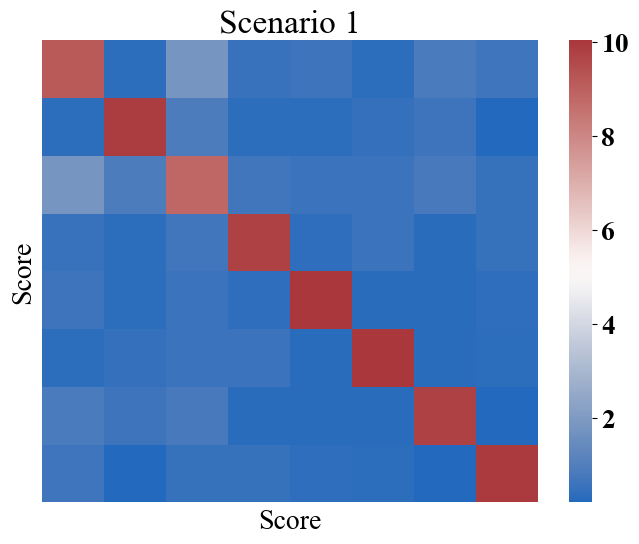

In [303]:
################ section 4
################ quartet-based similarity matrix matrix
s=np.zeros([8,8])
for i in range (0,8):
    for j in range (0,8):
        for k in range(0,8):
           for l in range(0,8): 
            if k!=i and k!=j and l!=i and l!=j:
              b=np.abs((asa[i][j]*asa[k][l])-(asa[i][l]*asa[k][j]))
              s[i][j]=s[i][j]+b
plt.figure(figsize=(8, 6))                 
sb.heatmap(s,cmap="vlag")
plt.xticks([]) 
plt.yticks([]) 
plt.ylabel("Score")
plt.xlabel("Score")
plt.title("Scenario 1")
plt.savefig('independent_quartet.tiff', format='tiff', dpi=600, bbox_inches='tight')


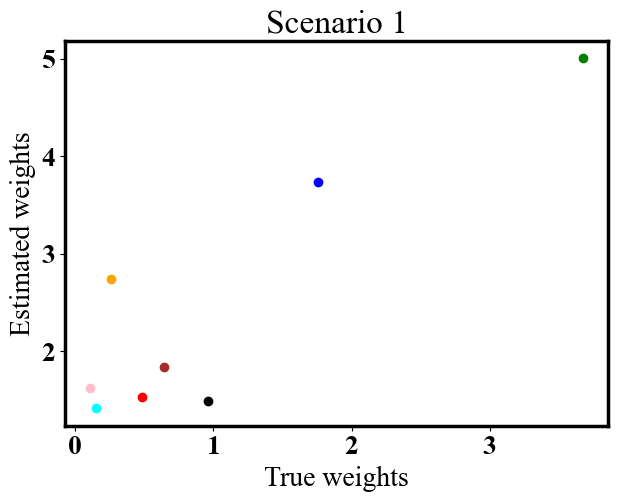

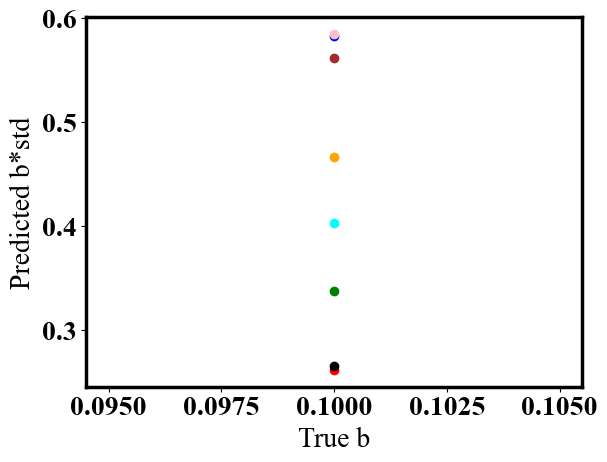

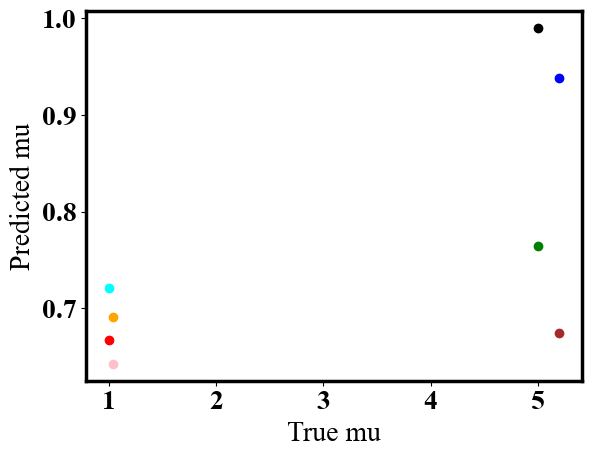

ROC-AUC: 0.9152734374999999
PRC-AUC: 0.7812599114547776


In [285]:
############### section 5
############### SUEL.CQO
c=[[0],[1],[2],[3],[4],[5],[6],[7]]
A=np.zeros([28,25]) #m(m-1)/2, m
B=np.zeros([28,25])
z=np.zeros(28)
from itertools import combinations
########### diagonal blocks equations
h=[i for i in range(0,25)]#np.load('linear_system_parameters.npy')
#np.save('linear_system_parameters',res.x[0:31])
n=0
for k in range (0,8): #35 equations
  a = list(combinations(c[k], 2))
  for i in range (0,len(a)):
      A[n][a[i][0]]=1
      A[n][a[i][1]]=1
      A[n][8+k]=1
      z[n]=np.log(np.abs(asa[a[i][0]][a[i][1]]))
      B[n][a[i][0]]=h[a[i][0]]
      B[n][a[i][1]]=h[a[i][1]]
      B[n][8+k]=h[8+k]
      n=n+1
from itertools import product
for i in range(0,8):
    for j in range(i,8):
        if j != i:
          l1, l2 = c[i],c[j]
          a = list(product(l1, l2))
          for k in range (0,len(a)):
            A[n][a[k][0]]=1
            A[n][a[k][1]]=1
            A[n][16+i]=1
            A[n][16+j]=1
            A[n][24]=1
            z[n]=np.log(np.abs(asa[a[k][0]][a[k][1]]))
            B[n][a[k][0]]=h[a[k][0]]
            B[n][a[k][1]]=h[a[k][1]]
            B[n][16+i]=h[16+i]
            B[n][16+j]=h[16+j]
            B[n][24]=h[24]
            n=n+1


############################################ constrained_linear_system of equation


cccc=lsq_linear(A,z,bounds=(- np.inf,0))
h=cccc.x
fff=np.exp(cccc.x[-1])-(((np.exp(cccc.x[0:8]))**2)*(1-np.exp(cccc.x[-1]))*(np.exp(cccc.x[16:24]))**2)

acc1=-(np.exp(cccc.x[0])*np.exp(cccc.x[16]))/fff[0]
acc2=-(np.exp(cccc.x[1])*np.exp(cccc.x[17]))/fff[1]
acc3=-(np.exp(cccc.x[2])*np.exp(cccc.x[18]))/fff[2]
acc4=-(np.exp(cccc.x[3])*np.exp(cccc.x[19]))/fff[3]
acc5=-(np.exp(cccc.x[4])*np.exp(cccc.x[20]))/fff[4]
acc6=-(np.exp(cccc.x[5])*np.exp(cccc.x[21]))/fff[5]
acc7=-(np.exp(cccc.x[6])*np.exp(cccc.x[22]))/fff[6]
acc8=-(np.exp(cccc.x[7])*np.exp(cccc.x[23]))/fff[7]

fig, ax = plt.subplots(figsize=(7,5))
font = {'family' : 'Times New Roman',
        'size'   : 22}
plt.scatter(abs(true_acc1),abs(acc1) , color='green')
plt.scatter(abs(true_acc2), abs(acc2), color='red')
plt.scatter(abs(true_acc3), abs(acc3), color='blue')
plt.scatter(abs(true_acc4), abs(acc4), color='orange')
plt.scatter(abs(true_acc5), abs(acc5), color='black')
plt.scatter(abs(true_acc6), abs(acc6), color='cyan')
plt.scatter(abs(true_acc7), abs(acc7), color='brown')
plt.scatter(abs(true_acc8), abs(acc8), color='pink')
plt.xlabel('True weights')
plt.ylabel('Estimated weights')
plt.title("Scenario 1")
plt.show()
#plt.legend(["X1", "X2","X3", "X4","X5","X6",'X7','X8' ], loc ="lower right")
#######################################################

plt.scatter(b_alpha1,np.exp(cccc.x[0])*np.array(x1_std), color='green')
plt.scatter(b_alpha2,np.exp(cccc.x[1])*np.array(x2_std), color='red')
plt.scatter(b_alpha3,np.exp(cccc.x[2])*np.array(x3_std), color='blue')
plt.scatter(b_alpha4,np.exp(cccc.x[3])*np.array(x4_std), color='orange')
plt.scatter(b_alpha5,np.exp(cccc.x[4])*np.array(x5_std), color='black')
plt.scatter(b_alpha6,np.exp(cccc.x[5])*np.array(x6_std), color='cyan')
plt.scatter(b_alpha7,np.exp(cccc.x[6])*np.array(x7_std), color='brown')
plt.scatter(b_alpha8,np.exp(cccc.x[7])*np.array(x8_std), color='pink')
plt.xlabel('True b')
plt.ylabel('Predicted b*std')
plt.show()
#########################################################

##########################################################

plt.scatter(5,np.exp(cccc.x[16]) , color='green')
plt.scatter(1,np.exp(cccc.x[17]), color='red')
plt.scatter(abs(mu2[0]),np.exp(cccc.x[18]), color='blue')
plt.scatter(abs(mu3[0]),np.exp(cccc.x[19]), color='orange')
plt.scatter(abs(mu4[0]),np.exp(cccc.x[20]), color='black')
plt.scatter(abs(mu5[0]),np.exp(cccc.x[21]), color='cyan')
plt.scatter(abs(mu6[0]),np.exp(cccc.x[22]), color='brown')
plt.scatter(abs(mu7[0]),np.exp(cccc.x[23]), color='pink')
plt.xlabel('True mu')
plt.ylabel('Predicted mu')
plt.show()


acc=abs(np.array([acc1,acc2,acc3,acc4, acc5, acc6,acc7,acc8]))
ensemble1_app1=np.array(x1).T*abs(acc1)
ensemble2_app1=np.array(x2).T*abs(acc2)
ensemble3_app1=np.array(x3).T*abs(acc3)
ensemble4_app1=np.array(x4).T*abs(acc4)
ensemble5_app1=np.array(x5).T*abs(acc5)
ensemble6_app1=np.array(x6).T*abs(acc6)
ensemble7_app1=np.array(x7).T*abs(acc7)
ensemble8_app1=np.array(x8).T*abs(acc8)

ensembled_app=np.concatenate([ensemble1_app1,ensemble2_app1,ensemble3_app1,ensemble4_app1,ensemble5_app1,ensemble6_app1,ensemble7_app1,ensemble8_app1],axis=1)
suel_cqo=np.mean(ensembled_app, axis=1)


fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),np.array(suel_cqo),pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),np.array(suel_cqo),pos_label=1)
print("PRC-AUC:",auc(tpr2,fpr2))

In [286]:
####### section 6
######## Average of scores
average=np.mean(np.concatenate([x1,x2,x3,x4,x5,x6,x7,x8],axis=0),axis=0)

fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),np.array(average),pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),np.array(average),pos_label=1)
print("PRC-AUC:",auc(tpr2,fpr2))

ROC-AUC: 0.856328125
PRC-AUC: 0.6640459746851711


In [308]:
####### section 7
###### Best of predictors

all_score=np.concatenate([np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(x8)])
roc=[]
for i in range(0,len(all_score)):
    fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),all_score[i],pos_label=1)
    roc.append(auc(fpr1,tpr1))

best_score=all_score[np.argmax(np.array(roc))]
fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),np.array(best_score),pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),np.array(best_score),pos_label=1)
print("PRC-AUC:",auc(tpr2,fpr2))

ROC-AUC: 0.8772265625000001
PRC-AUC: 0.7003912747555839


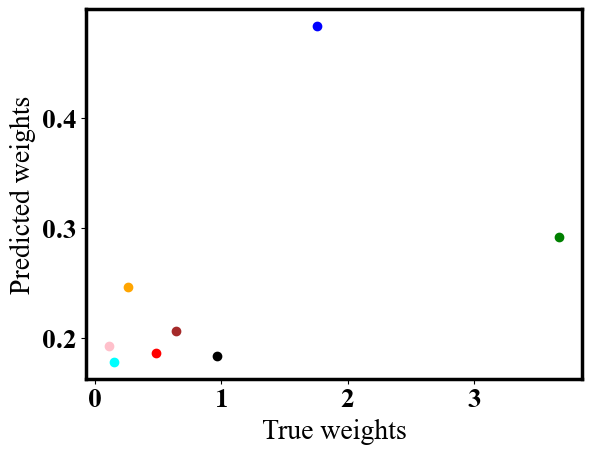

ROC-AUC: 0.8880859375000001
PRC-AUC: 0.7245577566099677


In [288]:
############ section 8
############ Eigen
from numpy import linalg
#new_score=x
#w,v=np.linalg.eig(asa)
#ens1=np.sum(x.T*v[0],axis=1)
c=[[0],[1],[2],[3],[4],[5],[6],[7]]
A=np.zeros([28,8]) #m(m-1)/2, m+2k+1
B=np.zeros([28,8])
z=np.zeros(28)
from itertools import combinations
########### diagonal blocks equations
h=[i for i in range(0,8)]#np.load('linear_system_parameters.npy')
#np.save('linear_system_parameters',res.x[0:31])
n=0
from itertools import product
for i in range(0,8):
    for j in range(i,8):
        if j != i:
          l1, l2 = c[i],c[j]
          a = list(product(l1, l2))
          for k in range (0,len(a)):
            A[n][a[k][0]]=1
            A[n][a[k][1]]=1
            z[n]=np.log(np.abs(asa[a[k][0]][a[k][1]]))
            B[n][a[k][0]]=h[a[k][0]]
            B[n][a[k][1]]=h[a[k][1]]
            n=n+1
from scipy.optimize import lsq_linear
ccccc=lsq_linear(A,z)
sum_b=np.sum(B,axis=1)

r2=1-(sum((sum_b-z)**2)/(sum((z-np.mean(z))**2)))


h=ccccc.x
acc11=np.exp(ccccc.x[0])
acc21=np.exp(ccccc.x[1])
acc31=np.exp(ccccc.x[2])
acc41=np.exp(ccccc.x[3])
acc51=np.exp(ccccc.x[4])
acc61=np.exp(ccccc.x[5])
acc71=np.exp(ccccc.x[6])
acc81=np.exp(ccccc.x[7])
       
ensemble1_app11=np.array(x1).T*abs(acc11)
ensemble2_app11=np.array(x2).T*abs(acc21)
ensemble3_app11=np.array(x3).T*abs(acc31)
ensemble4_app11=np.array(x4).T*abs(acc41)
ensemble5_app11=np.array(x5).T*abs(acc51)
ensemble6_app11=np.array(x6).T*abs(acc61)
ensemble7_app11=np.array(x7).T*abs(acc71)
ensemble8_app11=np.array(x8).T*abs(acc81)

plt.scatter(abs(true_acc1),abs(acc11) , color='green')
plt.scatter(abs(true_acc2), abs(acc21), color='red')
plt.scatter(abs(true_acc3), abs(acc31), color='blue')
plt.scatter(abs(true_acc4), abs(acc41), color='orange')
plt.scatter(abs(true_acc5), abs(acc51), color='black')
plt.scatter(abs(true_acc6), abs(acc61), color='cyan')
plt.scatter(abs(true_acc7), abs(acc71), color='brown')
plt.scatter(abs(true_acc8), abs(acc81), color='pink')
plt.xlabel('True weights')
plt.ylabel('Predicted weights')
plt.show()
#plt.title("Eigen-PC")
#plt.legend(["X1", "X2","X3", "X4","X5","X6",'X7','X8' ], loc ="lower right")

ensembled_appp=np.concatenate([ensemble1_app11,ensemble2_app11,ensemble3_app11,ensemble4_app11,ensemble5_app11,ensemble6_app11,ensemble7_app11,ensemble8_app11],axis=1)
eigen_pc=np.mean(ensembled_appp, axis=1)       

fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),np.array(eigen_pc),pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),np.array(eigen_pc),pos_label=1)
print("PRC-AUC:",auc(tpr2,fpr2)) 


/var/folders/63/r5m31vp516x6qwddwfqtw5xh0000gr/T/ipykernel_55214/4192609834.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  B[j][i]=np.sum(U[:,i]*np.array(RR[i][j,:]))/(np.sum(U[:,i]*U[:,i]))


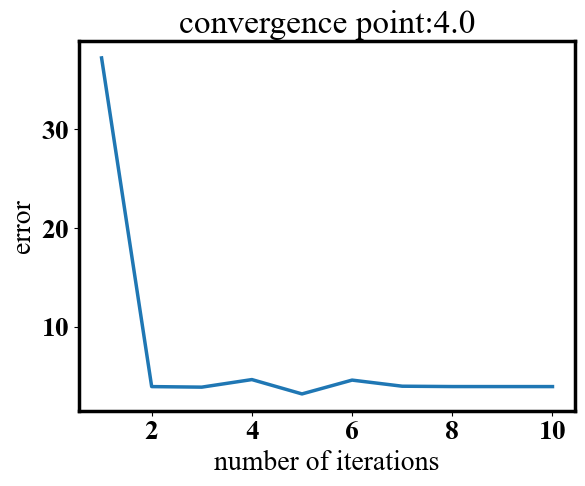

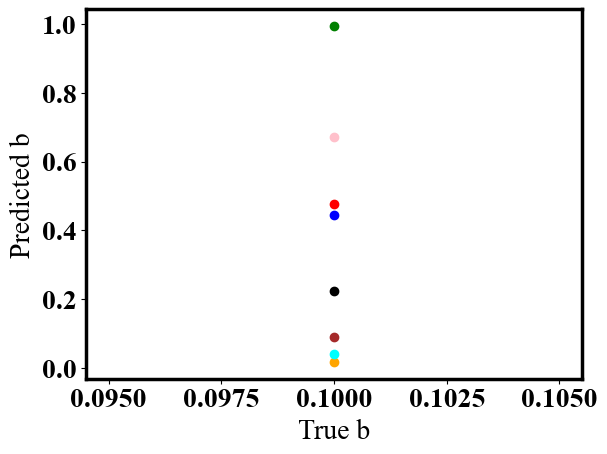

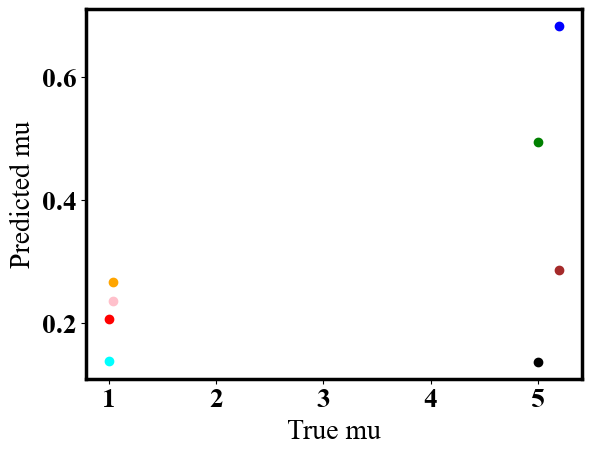

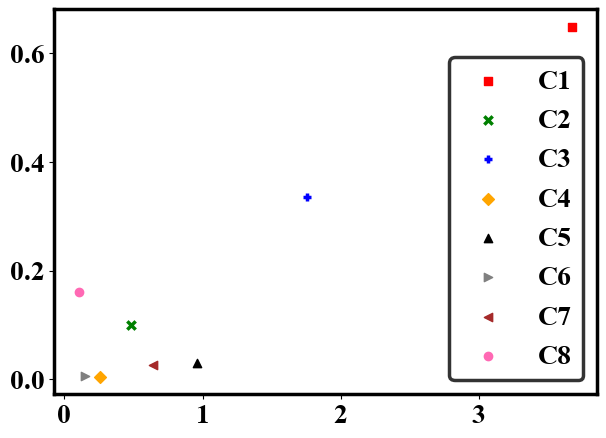

ROC-AUC: 0.91828125
prc-AUC: 0.7845861868118645


In [318]:
############### section 9
################ SUEL.MF
cc=[[i] for i in range(0,8)]
R=np.cov(x)
from scipy import linalg
d,w=linalg.eig(R)
index=np.argsort(-d)
W=w[:,index[0:8]]
################# computing B
B=np.zeros((8,8))
bb=np.random.rand(8,8)
U=np.zeros((8,8))
uu=np.random.rand(8,8)
U=U+uu
B=B+bb
RR=[]
ep1=[] 
diag_A=np.zeros((len(R),len(R))) 
for ii in range(0,10):
    d,w=linalg.eig(R-diag_A)
    index=np.argsort(-d)
    W=w[:,index[0:8]]
    RR=[]
    for i in range(0,8):
        c=-np.matmul(np.matrix(B[:,i]).T,np.matrix(U[:,i]))
        for f in range (0,8):
           c=np.matmul(np.matrix(B[:,f]).T,np.matrix(U[:,f]))+c
        RR.append(W-c)
    for i in range(0,8):   
       for j in range (0,8):
            if j in cc[i]: 
               B[j][i]=np.sum(U[:,i]*np.array(RR[i][j,:]))/(np.sum(U[:,i]*U[:,i]))
            else:
               B[j][i]=0            
################## computing U
    S=np.matmul(B.T,W) 
    uu,ss,vvh=np.linalg.svd(S)
    U=np.matmul(uu,vvh) 
    asar=np.matmul(U,np.matmul(np.diag(d[index[0:8]]),U.T))
    diag_A=np.diag(np.diag(R-np.matmul(B,np.matmul(asar,B.T))))
    epsilon=abs(np.sum((W-np.matmul(B,U))*(W-np.matmul(B,U))))
    ep1.append(epsilon)    
plt.plot(np.arange(1,11),ep1)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("convergence point:{}".format(np.round(ep1[-1],2)))
plt.show()
##################
###########################################
B=abs(B)
plt.scatter(b_alpha1,B[0,0] , color='green')
plt.scatter(b_alpha2,B[1,1], color='red')
plt.scatter(b_alpha3,B[2,2], color='blue')
plt.scatter(b_alpha4,B[3,3], color='orange')
plt.scatter(b_alpha5,B[4,4], color='black')
plt.scatter(b_alpha6,B[5,5], color='cyan')
plt.scatter(b_alpha7,B[6,6], color='brown')
plt.scatter(b_alpha8,B[7,7], color='pink')

plt.xlabel('True b')
plt.ylabel('Predicted b')
plt.show()
################################ computing mu0
h=[i for i in range(0,8)]#np.load('linear_system_parameters.npy')
A=np.zeros([28,8]) #m(m-1)/2, m
BB=np.zeros([28,8])
z=np.zeros(28)
n=0
from itertools import product
for i in range(0,8):
    for j in range(i,8):
        if j != i:
          l1, l2 = cc[i],cc[j]
          a = list(product(l1, l2))
          for k in range (0,len(a)):
            A[n][a[k][0]]=1
            A[n][a[k][1]]=1
            z[n]=np.log(np.abs(asa[a[k][0]][a[k][1]]))
            BB[n][a[k][0]]=h[a[k][0]]
            BB[n][a[k][1]]=h[a[k][1]]
            n=n+1
from scipy.optimize import lsq_linear
cccccc=lsq_linear(A,z)
################################ computing eigen decomposition
delta=np.matmul(U,np.matmul(np.diag(d[index[0:8]]),U.T))
for i in range (0,8):
    delta[i][i]=np.exp(2*cccccc.x[i])
dd,ww=linalg.eig(delta)      
mu=abs(np.real(ww[:,0]))    
##############################################
plt.scatter(5, abs(mu[0]), color='green')
plt.scatter(1, abs(mu[1]), color='red')
plt.scatter(abs(mu2[0]),abs(mu[2]), color='blue')
plt.scatter(abs(mu3[0]),abs(mu[3]), color='orange')
plt.scatter(abs(mu4[0]),abs(mu[4]), color='black')
plt.scatter(abs(mu5[0]),abs(mu[5]), color='cyan')
plt.scatter(abs(mu6[0]),abs(mu[6]), color='brown')
plt.scatter(abs(mu7[0]),abs(mu[7]), color='pink')
plt.xlabel('True mu')
plt.ylabel('Predicted mu')
plt.show()
######################################### computing accuracy
B=abs(B)
acc11=-(B[0,0]*mu[0])/(1-((B[0,0]*mu[0])**2))
acc22=-(B[1,1]*mu[1])/(1-((B[1,1]*mu[1])**2))
acc33=-(B[2,2]*mu[2])/(1-((B[2,2]*mu[2])**2))
acc44=-(B[3,3]*mu[3])/(1-((B[3,3]*mu[3])**2))
acc55=-(B[4,4]*mu[4])/(1-((B[4,4]*mu[4])**2))
acc66=-(B[5,5]*mu[5])/(1-((B[5,5]*mu[5])**2))
acc77=-(B[6,6]*mu[6])/(1-((B[6,6]*mu[6])**2))
acc88=-(B[7,7]*mu[7])/(1-((B[7,7]*mu[7])**2))

fig, ax = plt.subplots(figsize=(7,5))
font = {'family' : 'Times New Roman',
        'size'   : 28}
plt.scatter(abs(true_acc1),abs(acc11) , color='red',marker="s")
plt.scatter(abs(true_acc2), abs(acc22), color='green',marker="x")
plt.scatter(abs(true_acc3), abs(acc33), color='blue',marker="+")
plt.scatter(abs(true_acc4), abs(acc44), color='orange',marker="D")
plt.scatter(abs(true_acc5), abs(acc55), color='black',marker="^")
plt.scatter(abs(true_acc6), abs(acc66), color='gray',marker=">")
plt.scatter(abs(true_acc7), abs(acc77), color='brown',marker="<")
plt.scatter(abs(true_acc8), abs(acc88), color='hotpink')
#plt.xlabel('True weights')
#plt.ylabel('Predicted weights')
leg=plt.legend(["C1", "C2","C3" ,"C4","C5","C6","C7","C8"], loc ="lower right")
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(2.5)
plt.savefig('Scenario3.tiff',format='tiff', dpi=600)
plt.show()
acc=abs(np.array([acc11,acc22,acc33,acc44, acc55, acc66,acc77,acc88]))

ensemble1_app11=np.array(x1).T*abs(acc11)
ensemble2_app11=np.array(x2).T*abs(acc22)
ensemble3_app11=np.array(x3).T*abs(acc33)
ensemble4_app11=np.array(x4).T*abs(acc44)
ensemble5_app11=np.array(x5).T*abs(acc55)
ensemble6_app11=np.array(x6).T*abs(acc66)
ensemble7_app11=np.array(x7).T*abs(acc77)
ensemble8_app11=np.array(x8).T*abs(acc88)

ensembled_appp=np.concatenate([ensemble1_app11,ensemble2_app11,ensemble3_app11,ensemble4_app11,ensemble5_app11,ensemble6_app11,ensemble7_app11,ensemble8_app11],axis=1)
suel_mf=np.mean(ensembled_appp, axis=1) 
fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),np.array(suel_mf),pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),np.array(suel_mf),pos_label=1)
print("prc-AUC:",auc(tpr2,fpr2)) 


In [294]:
######### section 10
######### Ground truth
ensemble1_app1=np.array(x1).T*abs(true_acc1)
ensemble2_app1=np.array(x2).T*abs(true_acc2)
ensemble3_app1=np.array(x3).T*abs(true_acc3)
ensemble4_app1=np.array(x4).T*abs(true_acc4)
ensemble5_app1=np.array(x5).T*abs(true_acc5)
ensemble6_app1=np.array(x6).T*abs(true_acc6)
ensemble7_app1=np.array(x7).T*abs(true_acc7)
ensemble8_app1=np.array(x8).T*abs(true_acc8)

ensembled_app=np.concatenate([ensemble1_app1,ensemble2_app1,ensemble3_app1,ensemble4_app1,ensemble5_app1,ensemble6_app1,ensemble7_app1,ensemble8_app1],axis=1)
ground_truth=np.mean(ensembled_app, axis=1)


fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),np.array(ground_truth),pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),np.array(ground_truth),pos_label=1)
print("PRC-AUC:",auc(tpr2,fpr2))

ROC-AUC: 0.9327734375
PRC-AUC: 0.8300141753088259


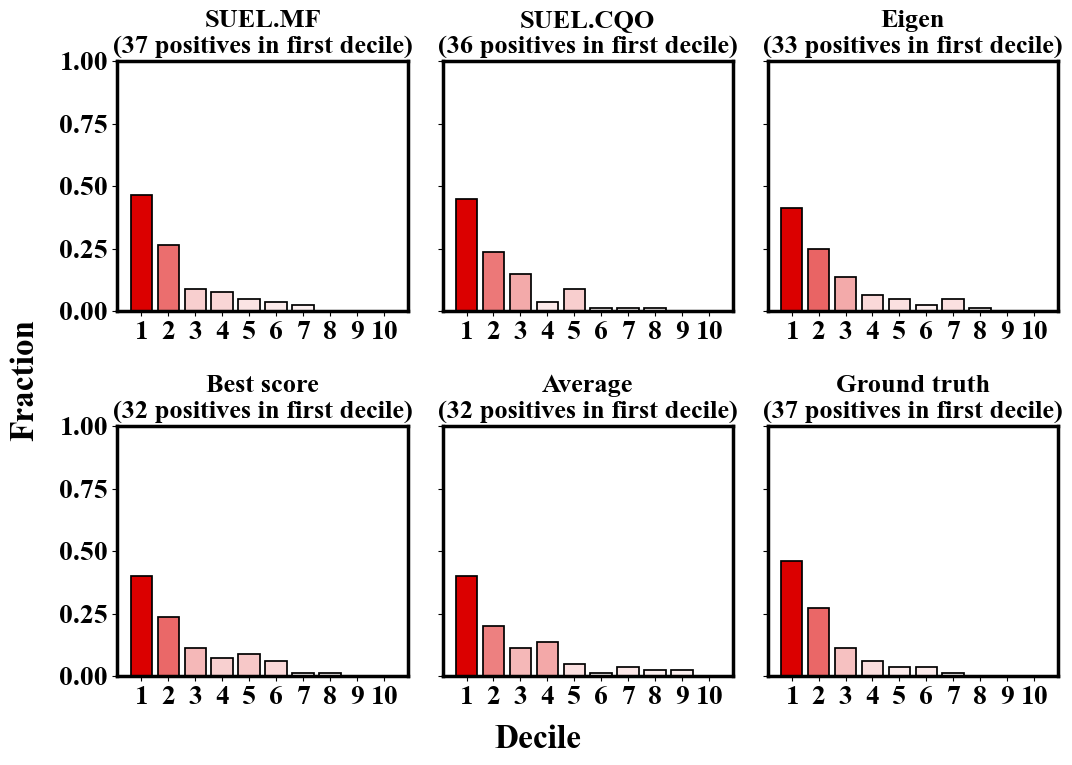

In [300]:
############### section 11
# The distribution of positive samples across different decile of prediction models
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
yy=np.array(yy)

ensemble_scores = [
    np.array(suel_mf),
    np.array(suel_cqo),
    np.array(eigen),
    np.array(best_score),
    np.array(average),
    np.array(ground_truth)
]

# Create subplots for each ensemble score
fig, axs = plt.subplots(2, 3, figsize=(11, 8), sharey=True)
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 20}
plt.rc('font', **font)

# List of labels for subplots
labels = ['SUEL.MF', 'SUEL.CQO', 'Eigen', 'Best score', 'Average','Ground truth']

# Iterate over each ensemble score and plot
for i, scores in enumerate(ensemble_scores):
    # Sort the scores and labels together
    inds = (-scores).argsort()
    sorted_gene = yy[inds]

    def divide(lst, n):
        p = len(lst) // n
        if len(lst)-p > 0:
            return [lst[:p]] + divide(lst[p:], n-1)
        else:
            return [lst]
    
    lst = sorted_gene
    b = divide(lst, 10)
    numbers = [sum(sublist) for sublist in b]
    overlap = np.sum(np.array(numbers))
    data = np.array(numbers) / np.sum(np.array(numbers))

    # Plotting each ensemble score in the corresponding subplot
    row = i // 3  # Determine the row index (0 or 1)
    col = i % 3   # Determine the column index (0, 1, or 2)
    ax = axs[row, col]  # Select the correct subplot

    # Colorize the graph based on likeability:
    likeability_scores = -np.array(data)
    data_normalizer = mp.colors.Normalize()
    color_map = mp.colors.LinearSegmentedColormap(
        "my_map",
        {'blue':   ((0.0, 0.0, 0.0), 
                     (1.0, 1,   1)),  # red ), # blue
         'green': ((0.0, 0.0, 0.0),
                   (1.0, 1, 1)),
         'red':  ((0.0, 0.86, 0.86),
                  (1.0, 1, 1))  # blue
        }
    )

    # Map xs to numbers:
    N = len(data)
    x_nums = np.arange(1, N+1)

    # Plot a bar graph:
    ax.bar(
        x_nums,
        data,
        align="center",
        color=color_map(data_normalizer(likeability_scores)),
        linewidth=1.25,
        ec="k"
    )
   
    ax.set_title(f'{labels[i]}\n({numbers[0]} positives in first decile)', loc='center', fontsize=19, fontweight='bold')
    ax.set_ylim((0, 1))
    ax.set_xticks(x_nums)

# Remove any extra subplots if there are fewer than 6 ensembles
if len(ensemble_scores) < 6:
    for i in range(len(ensemble_scores), 6):
        fig.delaxes(axs.flatten()[i])

# Set common labels for the whole figure
# Set common labels for the whole figure
fig.text(0.5, 0.04, 'Decile', ha='center', fontsize=24, fontweight='bold')
fig.text(0.02, 0.5, 'Fraction', va='center', rotation='vertical', fontsize=24, fontweight='bold')

# Adjust layout to prevent clipping
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

plt.show()
fig.savefig('independent_ASD_dist_fig.tiff', format='tiff', dpi=600, bbox_inches='tight')